In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import pickle

%matplotlib inline

In [2]:
# import tensorflow as tf
# tf.test.gpu_device_name()

In [3]:
# from tensorflow.python.client import device_lib
# device_lib.list_local_devices()

In [4]:
# !nvidia-smi

In [5]:
# To display all columns:
pd.pandas.set_option('display.max_columns', None)

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# os.chdir(r'/content/drive/MyDrive/higgs boson/')

## Loding Data:

In [8]:
# For colab
# df1 = pd.read_csv('train_MICE_median_ind_QuantileTransformer.csv')
# df2 = pd.read_csv('train_MICE_med_ind_QT_dropOutlier.csv')

df1 = pd.read_csv('../data/interim/train_MICE_median_ind_QuantileTransformer.csv')
df2 = pd.read_csv('../data/interim/train_MICE_med_ind_QT_dropOutlier.csv')

In [9]:
X, y = df1.drop(columns=['Weight', 'Label']), df1['Weight']
X2, y2 = df2.drop(columns=['Weight', 'Label']), df2['Weight']

In [10]:
print(df1.shape, df2.shape, sep='\n')

(250000, 33)
(236794, 33)


## Train-test split:

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30000)     # about 12%
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=30000)   # about 12%

## Visualizing Weight column:

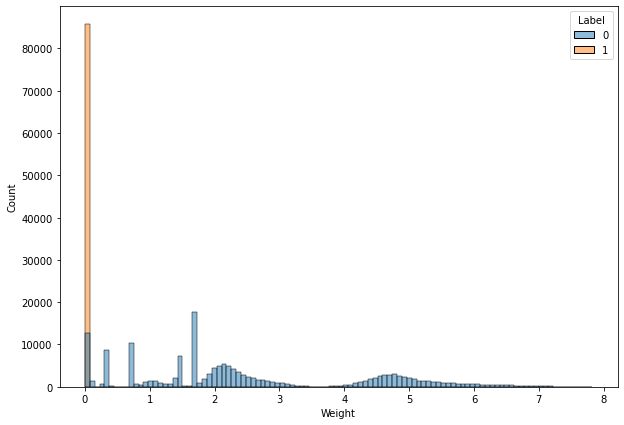

In [15]:
plt.figure(figsize=(10, 7))
sns.histplot(data=df1, x='Weight', hue='Label')
plt.show()

## Grid Search CV:

In [14]:
# import pickle
# # Write the object to file
# with open('grid_search_info.pkl', 'wb') as f:
#     pickle.dump((t1, t2), f)

<b style="color: orange; font-size: 20px;"> Note:</b><br /> <p>Grid Search CV is turning out to be too computationally expensive. So going with `cross_val_score()` & manually saving the models.</p>

## Lazy Predict:

The below block of code almost took `8 hrs` in my local machine. Hopefully never doing it again!!!

In [12]:
# Import libraries
from lazypredict.Supervised import LazyRegressor

# Defines and builds the lazyclassifier
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

f:\installationfolder\anaconda\envs\higgs_boson\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [22]:
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Prints the model performance
models

 26%|█████████████████████▍                                                            | 11/42 [07:59<23:34, 45.64s/it]

GaussianProcessRegressor model failed to execute
Unable to allocate 361. GiB for an array with shape (220000, 220000) and data type float64


 40%|█████████████████████████████████▏                                                | 17/42 [18:01<39:01, 93.67s/it]

KernelRidge model failed to execute
Unable to allocate 361. GiB for an array with shape (220000, 220000) and data type float64


100%|█████████████████████████████████████████████████████████████████████████████| 42/42 [14:31:21<00:00, 1244.81s/it]


NameError: name 'models_train' is not defined

In [23]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.63,0.63,1.15,9.21
LGBMRegressor,0.63,0.63,1.15,4.15
MLPRegressor,0.62,0.62,1.15,242.95
XGBRegressor,0.62,0.62,1.15,55.54
ExtraTreesRegressor,0.62,0.62,1.15,282.19
RandomForestRegressor,0.62,0.62,1.16,1444.73
NuSVR,0.61,0.61,1.17,29308.84
GradientBoostingRegressor,0.60,0.60,1.18,266.84
SVR,0.60,0.60,1.18,20098.85


In [24]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.63,0.63,1.15,9.21
LGBMRegressor,0.63,0.63,1.15,4.15
MLPRegressor,0.62,0.62,1.15,242.95
XGBRegressor,0.62,0.62,1.15,55.54
ExtraTreesRegressor,0.62,0.62,1.15,282.19
RandomForestRegressor,0.62,0.62,1.16,1444.73
NuSVR,0.61,0.61,1.17,29308.84
GradientBoostingRegressor,0.60,0.60,1.18,266.84
SVR,0.60,0.60,1.18,20098.85


In [41]:
try:
    os.mkdir(r'../reports/lazypredict')
    os.mkdir(r'../reports/lazypredict/regg')
except FileExistsError as fee:
    print(fee)

[WinError 183] Cannot create a file when that file already exists: '../reports/lazypredict'


In [18]:
import sklearn
ver = 'sklearn==' + str(sklearn.__version__) + '\nlazypredict==0.2.9'
ver

'sklearn==0.23.1\nlazypredict==0.2.9'

In [19]:
with open('../reports/lazypredict/regg/dependency.txt', 'w') as fp:
    fp.write(ver)

In [25]:
sub = str(time.localtime().tm_hour) + '_' + str(time.localtime().tm_min) \
    + '_' + str(time.localtime().tm_mday) + '_' + str(time.localtime().tm_mon) \
    + '_' + str(time.localtime().tm_year)
sub

'2_12_10_9_2021'

In [29]:
# Saving LazyPredict csv files & model for future refernce
models.to_csv(f"../reports/lazypredict/regg/train_{sub}.csv", index=False)
predictions.to_csv(f"../reports/lazypredict/regg/predict_{sub}.csv", index=False)


# Saving lazypredict model
# The saved file is 3.57 GB & must be added in gitignore
with open(f'../reports/lazypredict/regg/Lazypredict_regg_model_{sub}.pkl', 'wb') as fptr:
    pickle.dump(reg, fptr)
    print('Model saved in reports folder...')
    
# Saving also in models folder:
with open(f'../models/regg/Lazypredict_regg_model_{sub}.pkl', 'wb') as fptr:
    pickle.dump(reg, fptr)
    print('Model saved in models folder...')

Model saved in reports folder...
Model saved in models folder...


### Metrics:

Use sorted(sklearn.metrics.SCORERS.keys()) to get valid scoring options.

In [16]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
# For changing styling:
# from IPython.core.display import HTML
# def css_styling():
#     styles = open("styles/custom.css", "r").read()
#     return HTML(styles)
# css_styling()